In [170]:
from file_handler import *
from data_processor import *
from k_means import *
from pathlib import Path
import pandas as pd
import re

In [171]:
# Funktion, um die Zahl nach 'P' zu extrahieren
def extract_number(subject):
    match = re.search(r'\d+', subject)
    if match:
        # Rückgabe der Zahl als Ganzzahl, damit führende Nullen entfernt werden
        return int(match.group(0))
    return None  # Falls keine Zahl gefunden wird

In [172]:
current_path = Path().resolve()
parent_path = current_path.parent
#print(parent_path)

file_path = parent_path / 'Sample_Data_PAH/MusikPhysioAnalysis/00_VIOLIN/00_JOINT_ANGLE/output'
#type(file_path)

In [173]:
file_list = [f.name for f in file_path.iterdir() if '.tsv' in f.name]
complete_data = pd.DataFrame()
for file in file_list:
    #experiment = 'mpa'
    #source = "motion_capture"
    location = re.search(r'^(.*?)(?=\.tsv)', file).group(1)
    full_path = file_path / file
    file_handler = FileHandler(full_path)
    file_handler.load_file()
    data = file_handler.data
    data['value'] = pd.to_numeric(data['value'])
    
    data = data.rename(columns={'value':f'{location}'})
    if complete_data.empty:
        complete_data = data
    else:
        complete_data = pd.merge(complete_data, data, on=['subject', 'pre_post', 'bow_stroke', 'up_down', 'key', 'point'], 
                       how='left') 

In [174]:
complete_data['subject'] = complete_data['subject'].apply(extract_number)

In [175]:
file_path = parent_path / 'Sample_Data_PAH/MusikPhysioAnalysis/'
file_name = 'PRMD_High_Strings_Subgroups_Pain.xlsx'
full_path = file_path / file_name
file_handler = FileHandler(full_path)
file_handler.load_file()

pain_data = file_handler.data
pain_data = pain_data.rename(columns={'Probanden_ID':f'subject'})
pain_data.head()

,subject,Erstes_Instrument,PRMD_Schulter_Nacken_rechts,PRMD_Schulter_Nacken_links,PRMD_Oberarm_rechts,PRMD_Oberarm_links,Schmerzen_jemals
0,1,1,1,1,0,0,1
1,2,1,1,1,0,0,1
2,3,2,0,0,1,0,1
3,4,2,0,0,0,0,1
4,5,1,0,0,0,0,0


In [176]:
complete_data = pd.merge(complete_data, pain_data, on=['subject'], 
                       how='left') 

In [177]:
complete_data.head()

,subject,pre_post,bow_stroke,up_down,key,point,RIGHT_GH_JOINT_ANGLE_Y,RIGHT_WRIST_JOINT_ANGLE_Y,SP3_SP2_JOINT_ANGLE_X,THX_PEL_JOINT_ANGLE_Y,...,RIGHT_ST_JOINT_ANGLE_X,LEFT_GH_JOINT_ANGLE_Y,LEFT_HT_JOINT_ANGLE_Y,LEFT_ST_JOINT_ANGLE_Z,Erstes_Instrument,PRMD_Schulter_Nacken_rechts,PRMD_Schulter_Nacken_links,PRMD_Oberarm_rechts,PRMD_Oberarm_links,Schmerzen_jemals
0,1,0,0,0,G,0,-68.722,157.751,-0.333,1.880,...,-26.898,-24.911,-21.487,-6.222,1,1,1,0,0,1
1,1,0,0,0,G,1,-68.692,157.696,-0.323,1.831,...,-26.894,-24.835,-21.485,-6.190,1,1,1,0,0,1
2,1,0,0,0,G,2,-68.659,157.637,-0.313,1.773,...,-26.889,-24.755,-21.483,-6.156,1,1,1,0,0,1
3,1,0,0,0,G,3,-68.623,157.577,-0.302,1.705,...,-26.883,-24.673,-21.481,-6.123,1,1,1,0,0,1
4,1,0,0,0,G,4,-68.585,157.519,-0.291,1.624,...,-26.875,-24.594,-21.481,-6.092,1,1,1,0,0,1


In [178]:
features = ["RIGHT_GH_JOINT_ANGLE_X", "RIGHT_GH_JOINT_ANGLE_Y", "RIGHT_GH_JOINT_ANGLE_Z", "RIGHT_ELBOW_JOINT_ANGLE_Z"]

In [230]:
complete_data_processed = complete_data.dropna(subset = features)
complete_data_processed = complete_data_processed[(complete_data_processed['pre_post'] == 0 )& (complete_data_processed['up_down'] == 0 )]
complete_data_processed = complete_data_processed.groupby(['subject','key'], as_index=False).mean()

In [231]:
complete_data_processed

,subject,key,pre_post,bow_stroke,up_down,point,RIGHT_GH_JOINT_ANGLE_Y,RIGHT_WRIST_JOINT_ANGLE_Y,SP3_SP2_JOINT_ANGLE_X,THX_PEL_JOINT_ANGLE_Y,...,RIGHT_ST_JOINT_ANGLE_X,LEFT_GH_JOINT_ANGLE_Y,LEFT_HT_JOINT_ANGLE_Y,LEFT_ST_JOINT_ANGLE_Z,Erstes_Instrument,PRMD_Schulter_Nacken_rechts,PRMD_Schulter_Nacken_links,PRMD_Oberarm_rechts,PRMD_Oberarm_links,Schmerzen_jemals
0,1,A,0.0,8.0,0.0,50.0,-56.443886,162.276936,-1.627554,-2.838307,...,-21.953594,-30.060698,-24.525035,-6.412292,1.0,1.0,1.0,0.0,0.0,1.0
1,1,B,0.0,10.0,0.0,50.0,-51.763827,162.797094,-2.024465,-2.560847,...,-18.639604,-29.790356,-23.830584,-6.860054,1.0,1.0,1.0,0.0,0.0,1.0
2,1,C#,0.0,12.0,0.0,50.0,-53.596391,162.856272,-2.592158,-2.501644,...,-19.968465,-29.593762,-23.440594,-6.317540,1.0,1.0,1.0,0.0,0.0,1.0
3,1,D#,0.0,14.0,0.0,50.0,-48.792475,163.327119,-2.081436,-3.712431,...,-17.278485,-31.522861,-24.666411,-6.898470,1.0,1.0,1.0,0.0,0.0,1.0
4,1,F,0.0,16.0,0.0,50.0,-41.824574,163.391995,-1.686327,-1.857183,...,-14.121505,-31.694832,-25.350079,-6.973010,1.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,63,B,0.0,10.0,0.0,50.0,-45.433960,144.633936,-1.799233,-8.647228,...,-5.725861,-34.517436,-25.101366,-14.921134,1.0,0.0,0.0,1.0,0.0,1.0
212,63,C#,0.0,12.0,0.0,50.0,-45.798673,145.211475,-1.887673,-8.476926,...,-5.747965,-34.567574,-24.479074,-15.318738,1.0,0.0,0.0,1.0,0.0,1.0
213,63,D#,0.0,14.0,0.0,50.0,-43.045663,144.519233,-1.936327,-8.136262,...,-3.165332,-35.562559,-24.571678,-16.209639,1.0,0.0,0.0,1.0,0.0,1.0
214,63,F,0.0,16.0,0.0,50.0,-39.754713,143.465149,-1.946965,-8.512822,...,-1.770822,-34.895718,-25.204287,-14.886144,1.0,0.0,0.0,1.0,0.0,1.0


In [232]:
data = complete_data_processed[features].copy()

In [233]:
data

,RIGHT_GH_JOINT_ANGLE_X,RIGHT_GH_JOINT_ANGLE_Y,RIGHT_GH_JOINT_ANGLE_Z,RIGHT_ELBOW_JOINT_ANGLE_Z
0,30.489396,-56.443886,44.298911,93.958738
1,32.570252,-51.763827,43.830020,94.316421
2,29.717243,-53.596391,41.966683,92.924832
3,30.072010,-48.792475,38.888119,93.458020
4,33.492644,-41.824574,38.226455,95.183614
...,...,...,...,...
211,19.217366,-45.433960,39.942446,90.318589
212,18.734139,-45.798673,40.359020,90.016351
213,18.525490,-43.045663,38.370460,89.994287
214,22.426010,-39.754713,38.853198,92.329401


In [234]:
data = ((data-data.min()) / (data.max() - data.min())) * 9 + 1
data

,RIGHT_GH_JOINT_ANGLE_X,RIGHT_GH_JOINT_ANGLE_Y,RIGHT_GH_JOINT_ANGLE_Z,RIGHT_ELBOW_JOINT_ANGLE_Z
0,4.895804,3.888849,4.963918,7.102266
1,5.227175,4.804824,4.878757,7.218777
2,4.772840,4.446157,4.540334,6.765482
3,4.829336,5.386374,3.981199,6.939163
4,5.374064,6.750122,3.861027,7.501256
...,...,...,...,...
211,3.100761,6.043698,4.172688,5.916527
212,3.023808,5.972317,4.248347,5.818076
213,2.990581,6.511132,3.887181,5.810889
214,3.611729,7.155233,3.974857,6.571527


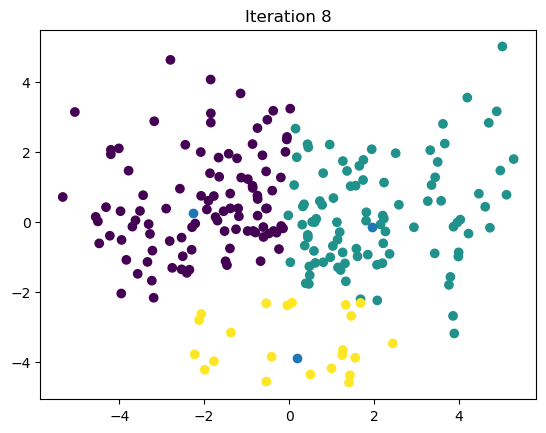

In [235]:
max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration +=1
    

In [236]:
centroids

,0,1,2
RIGHT_GH_JOINT_ANGLE_X,3.393425,6.030924,4.295081
RIGHT_GH_JOINT_ANGLE_Y,5.555141,5.175677,2.824368
RIGHT_GH_JOINT_ANGLE_Z,3.819482,6.204818,3.630003
RIGHT_ELBOW_JOINT_ANGLE_Z,6.992738,4.723028,2.983032


In [237]:
labels.value_counts()

0    100
1     94
2     22
Name: count, dtype: int64

In [238]:
complete_data_processed['labels'] = labels

In [239]:
# Gruppiere nach 'labels' und zähle die Häufigkeit von 'Schmerzen_jemals' in jedem Cluster
distribution = complete_data_processed.groupby('labels')['Schmerzen_jemals'].value_counts(normalize=True).unstack()

# Anzeigen der Verteilung
print(distribution)

Schmerzen_jemals       0.0       1.0
labels                              
0                 0.510000  0.490000
1                 0.393617  0.606383
2                 0.090909  0.909091


<Figure size 1000x600 with 0 Axes>

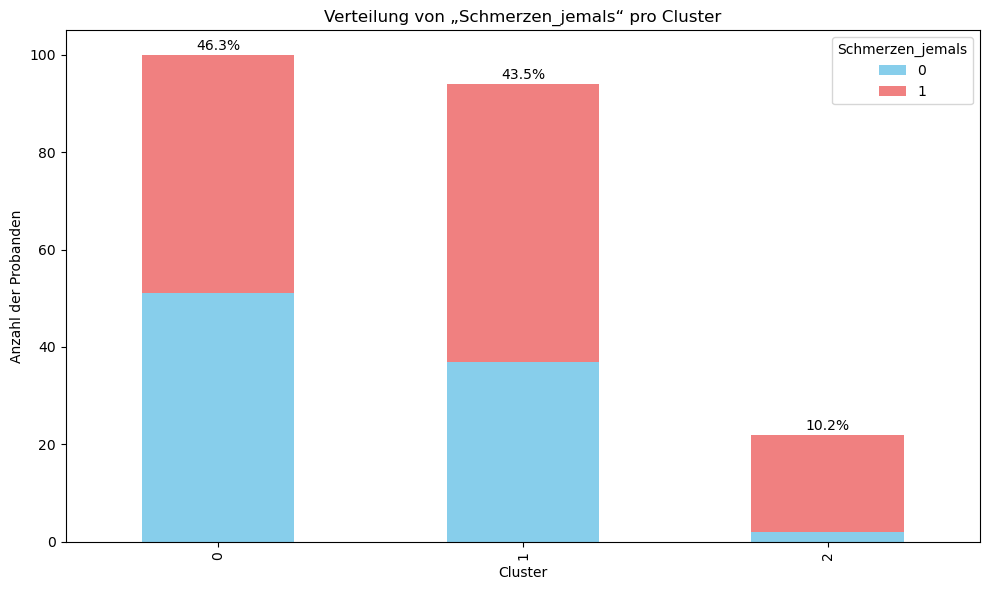

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Berechne die Häufigkeit von „Schmerzen_jemals“ (0 und 1) pro Cluster
distribution = complete_data_processed.groupby(['labels', 'Schmerzen_jemals']).size().unstack(fill_value=0)

# Berechne die Clustergröße als Prozentsatz des gesamten Datensatzes
cluster_sizes = complete_data_processed['labels'].value_counts(normalize=True)

# Plot erstellen: Gestapeltes Balkendiagramm
plt.figure(figsize=(10, 6))
distribution.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(10, 6))

# Clustergrößen als Prozentsatz anzeigen (optional als Text auf den Balken)
for i, label in enumerate(distribution.index):
    plt.text(i, distribution.iloc[i].sum() + 1, f'{cluster_sizes[label]*100:.1f}%', ha='center', color='black')

# Achsenbeschriftungen und Titel
plt.xlabel('Cluster')
plt.ylabel('Anzahl der Probanden')
plt.title('Verteilung von „Schmerzen_jemals“ pro Cluster')

# Legende hinzufügen
plt.legend(title='Schmerzen_jemals', labels=['0', '1'])

# Diagramm anzeigen
plt.tight_layout()
plt.show()